<a href="https://colab.research.google.com/github/mchype99/python-notebooks/blob/main/calculator-and-threshold-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1

CAP 4613

McKerlton Hyppolite

Z23590874

https://colab.research.google.com/drive/1AX_IABv_QCgRY7EpaD8LVoLLHeV0-zt7?usp=sharing

Problem 1) Simple Calculator

In [ ]:
from math import exp, log, fmod, pow, fabs
import sys

def summation(num1, num2):
  return num1 + num2

def subtraction(num1, num2):
  return num1 - num2

def multiply(num1, num2):
  return num1 * num2

def division(num1, num2):
  return num1/num2

def switch(operation, num1, num2):
    dict={
      '+': summation(num1, num2),
      '-': subtraction(num1, num2),
      '*': multiply(num1, num2),
      '/': division(num1, num2),
      '%': fmod(num1, num2),
      '^': pow(num1, num2),
      'exp': exp(num1),
      'log': log(fabs(num1)),
      'abs': fabs(num1),
    }
    return dict.get(operation, 'Invalid Operation. Try again!')

#Main Program
print('''======================================================
                  Simple Calculator
======================================================''')

while True:
  #Ask user for first number
  num1 = (input('Enter first number here: '))
  num2 = ''
  
  #If x is enter, calculator is closed
  if num1 == 'x' or num1 == 'X':
    sys.exit('''======================================================
                  Calculator Closed
======================================================''')
  else:
    num1 = float(num1)
  
  #Ask user for operation
  print('Enter the operation: [+, -, *, /, %, ^, exp, log, abs]')
  operation = input('')
  #If operation requires second number, ask user for second number
  if operation == '+' or operation == '-' or operation == '*' or operation == '/' or operation == '%' or operation == '^':
    num2 = (input('Enter second number: '))
    if num2 == 'x' or num2 == 'X':
      sys.exit('''======================================================
                  Calculator Closed
======================================================''')
    else:
      num2 = float(num2)
  elif operation == 'x' or operation == 'X':
    sys.exit('''======================================================
                  Calculator Closed
======================================================''')
  else:
    num2 = 1.0
  #If operation enter is invalid, return to top of loop
  if switch(operation, num1, num2) == 'Invalid Operation. Try again!':
    print(switch(operation, num1, num2))
    continue
  else:
    if operation == 'exp' or operation == 'abs':
      print(operation, 'of', num1, '=', switch(operation, num1, num2))
    elif operation == 'log' and num1 > 0:
      print(operation, 'of', fabs(num1), '=', switch(operation, num1, num2))
    elif operation == 'log' and num1 <= 0:
      print('Number must be greater than 0 to perform log.')
    else:
      print(num1, '', operation, '', num2, ' = ', switch(operation, num1, num2))

                  Simple Calculator
Enter first number here: 12
Enter the operation: [+, -, *, /, %, ^, exp, log, abs]
+
Enter second number: 14
12.0  +  14.0  =  26.0
Enter first number here: 12
Enter the operation: [+, -, *, /, %, ^, exp, log, abs]
-
Enter second number: 5
12.0  -  5.0  =  7.0
Enter first number here: 15
Enter the operation: [+, -, *, /, %, ^, exp, log, abs]
*
Enter second number: 2
15.0  *  2.0  =  30.0
Enter first number here: 16
Enter the operation: [+, -, *, /, %, ^, exp, log, abs]
/
Enter second number: 4
16.0  /  4.0  =  4.0
Enter first number here: 16
Enter the operation: [+, -, *, /, %, ^, exp, log, abs]
%
Enter second number: 5
16.0  %  5.0  =  1.0
Enter first number here: 2
Enter the operation: [+, -, *, /, %, ^, exp, log, abs]
^
Enter second number: 5
2.0  ^  5.0  =  32.0
Enter first number here: 5
Enter the operation: [+, -, *, /, %, ^, exp, log, abs]
exp
exp of 5.0 = 148.4131591025766
Enter first number here: 5
Enter the operation: [+, -, *, /, %, ^, exp

SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


*Problem* 2) Threshold-based Classifier

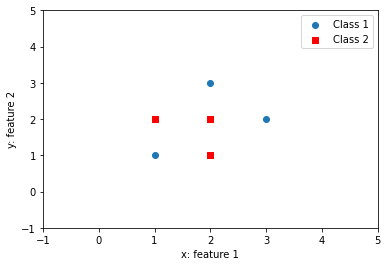

Enter the treshold values, TH_x and TH_y
Enter the TH_x value:0
Enter the TH_y value:0
The classifier accuracy for the selected thresholds is: 0.50
Enter the treshold values, TH_x and TH_y
Enter the TH_x value:5
Enter the TH_y value:5
The classifier accuracy for the selected thresholds is: 0.50
Enter the treshold values, TH_x and TH_y
Enter the TH_x value:-5
Enter the TH_y value:-5
The classifier accuracy for the selected thresholds is: 0.50


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#C1 and C2 data samples
c1 = np.array([[1, 1], [3, 2], [2, 3]])
c2 = np.array([[1, 2], [2, 2], [2, 1]])

#Plot data samples
def plot(c1, c2):
  plt.scatter(c1[:,0], c1[:,1])
  plt.scatter(c2[:,0], c2[:,1], facecolor = 'r', marker = 's')
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.axis([-1,5,-1,5])
  plt.legend(["Class 1", "Class 2"])
  plt.show()

#Classification accuracy calculation
def thresh_acc(TH_x, TH_y):
  c1_test = list(np.logical_and(c1[:, 0] > TH_x, c1[:, 1] > TH_y))
  c2_test = list(np.logical_or(c2[:, 0] <= TH_x, c2[:, 1] <= TH_y))
  total = float(c1_test.count(True) + c2_test.count(True))
  accuracy = total / 6.0
  print('The classifier accuracy for the selected thresholds is: {:0.2f}'.format(accuracy))

#Enter data plots into array
c1 = np.array([[1, 1], [3, 2], [2, 3]])
c2 = np.array([[1, 2], [2, 2], [2, 1]])
plot(c1, c2)

for x in range(3):
  while(x in range(3)):
    print('Enter the treshold values, TH_x and TH_y')
    try:
      TH_x = float(input('Enter the TH_x value:'))
    except: 
      print('Must be a number. Try again!')
      continue
    try:
      TH_y = float(input('Enter the TH_y value:'))
    except:
      print('Must be a number. Try again!')
      continue
    thresh_acc(TH_x, TH_y)
    break